<a href="https://colab.research.google.com/github/IT22312976/25-26j--340/blob/main/tws_identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install YOLOv8
!pip install ultralytics

# Import necessary libraries
import os
import yaml
from ultralytics import YOLO
from google.colab import drive
from IPython.display import Image, display
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 48.4 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def setup_dataset_paths(base_drive_path):
    """
    Creates a new data configuration file with absolute paths to ensure YOLO finds the images.
    """
    # Define absolute paths based on your folder structure
    train_path = os.path.join(base_drive_path, 'train/images')
    val_path = os.path.join(base_drive_path, 'valid/images')
    test_path = os.path.join(base_drive_path, 'test/images')

    # Data dictionary
    data_config = {
        'path': base_drive_path,  # Dataset root dir
        'train': train_path,
        'val': val_path,
        'test': test_path,
        'nc': 1,
        'names': ['earphone']
    }

    # Save to a new yaml file in the current working directory of Colab
    yaml_path = '/content/data_colab.yaml'
    with open(yaml_path, 'w') as f:
        yaml.dump(data_config, f, default_flow_style=False)

    print(f"Created configuration file at: {yaml_path}")
    print(f"Training data path: {train_path}")
    return yaml_path

In [ ]:
def train_yolo_model(yaml_config_path, epochs=25, img_size=640):
    """
    Trains the YOLOv8 model using the specified config.
    """
    # Load a pre-trained model (recommended for transfer learning)
    model = YOLO('yolov8n.pt')  # 'n' is the nano version, fastest. Use 's', 'm', 'l' for higher accuracy.

    # Train the model
    results = model.train(
        data=yaml_config_path,
        epochs=epochs,
        imgsz=img_size,
        plots=True,          # Save plots automatically
        project='/content/runs', # Save results to local Colab space first (faster)
        name='earphone_training'
    )

    print("Training Completed.")
    return model

In [ ]:
def evaluate_and_visualize(model, run_folder='/content/runs/earphone_training'):
    """
    Evaluates the model on validation data and displays generated graphs.
    """
    print("\n--- Starting Evaluation ---")
    metrics = model.val()

    print(f"\nMean Average Precision (mAP50): {metrics.box.map50}")
    print(f"Mean Average Precision (mAP50-95): {metrics.box.map}")

    # Helper to display images
    def show_result_image(filename):
        file_path = os.path.join(run_folder, filename)
        if os.path.exists(file_path):
            print(f"\nDisplaying {filename}:")
            display(Image(filename=file_path, width=800))
        else:
            print(f"File not found: {file_path}")

    # Display Confusion Matrix
    show_result_image('confusion_matrix.png')

    # Display Training Results (Loss, Precision, Recall curves)
    show_result_image('results.png')

    # Display a batch of validation predictions
    show_result_image('val_batch0_pred.jpg')

In [ ]:
def predict_image(model, image_path):
    """
    Predicts objects in a new image using the trained model.
    """
    if not os.path.exists(image_path):
        print(f"Image not found: {image_path}")
        return

    # Run inference
    results = model.predict(image_path, save=True, conf=0.5)

    # Show the predicted image
    for result in results:
        im_array = result.plot()  # plot a BGR numpy array of predictions
        img = Image(data=None) # Reset
        # Convert BGR to RGB for matplotlib if needed, or save and display
        result.save('prediction.jpg')
        display(Image(filename='prediction.jpg'))
        print(f"Prediction saved to prediction.jpg")

In [ ]:
def save_model_to_drive(run_folder, destination_folder):
    """
    Copies the best weights to Google Drive.
    """
    import shutil

    source = os.path.join(run_folder, 'weights', 'best.pt')
    destination = os.path.join(destination_folder, 'best_earphone_model.pt')

    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)

    if os.path.exists(source):
        shutil.copy(source, destination)
        print(f"Model saved successfully to: {destination}")
    else:
        print("Could not find trained weights file.")

In [ ]:
# 1. Define your Drive Path
# Ensure this matches exactly where your 'data' folder is in Drive
DRIVE_DATASET_PATH = '/content/drive/My Drive/data_lahiru_tws_detection/data'

In [ ]:
# 2. Setup Config
yaml_path = setup_dataset_paths(DRIVE_DATASET_PATH)

Created configuration file at: /content/data_colab.yaml
Training data path: /content/drive/My Drive/data_lahiru_tws_detection/data/train/images


In [ ]:
# 3. Train
model = train_yolo_model(yaml_path, epochs=10)

Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data_colab.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=earphone_training, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True


--- Starting Evaluation ---
Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.5±0.3 ms, read: 11.2±8.2 MB/s, size: 23.7 KB)
val: Scanning /content/drive/My Drive/data_lahiru_tws_detection/data/valid/labels.cache... 105 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 105/105 137.8Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 7/7 2.2it/s 3.2s
                   all        105        125      0.563       0.52      0.517      0.173
Speed: 6.0ms preprocess, 5.5ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to /content/runs/detect/val

Mean Average Precision (mAP50): 0.5167649476999384
Mean Average Precision (mAP50-95): 0.17327057557062076

Displaying confusion_matrix.png:


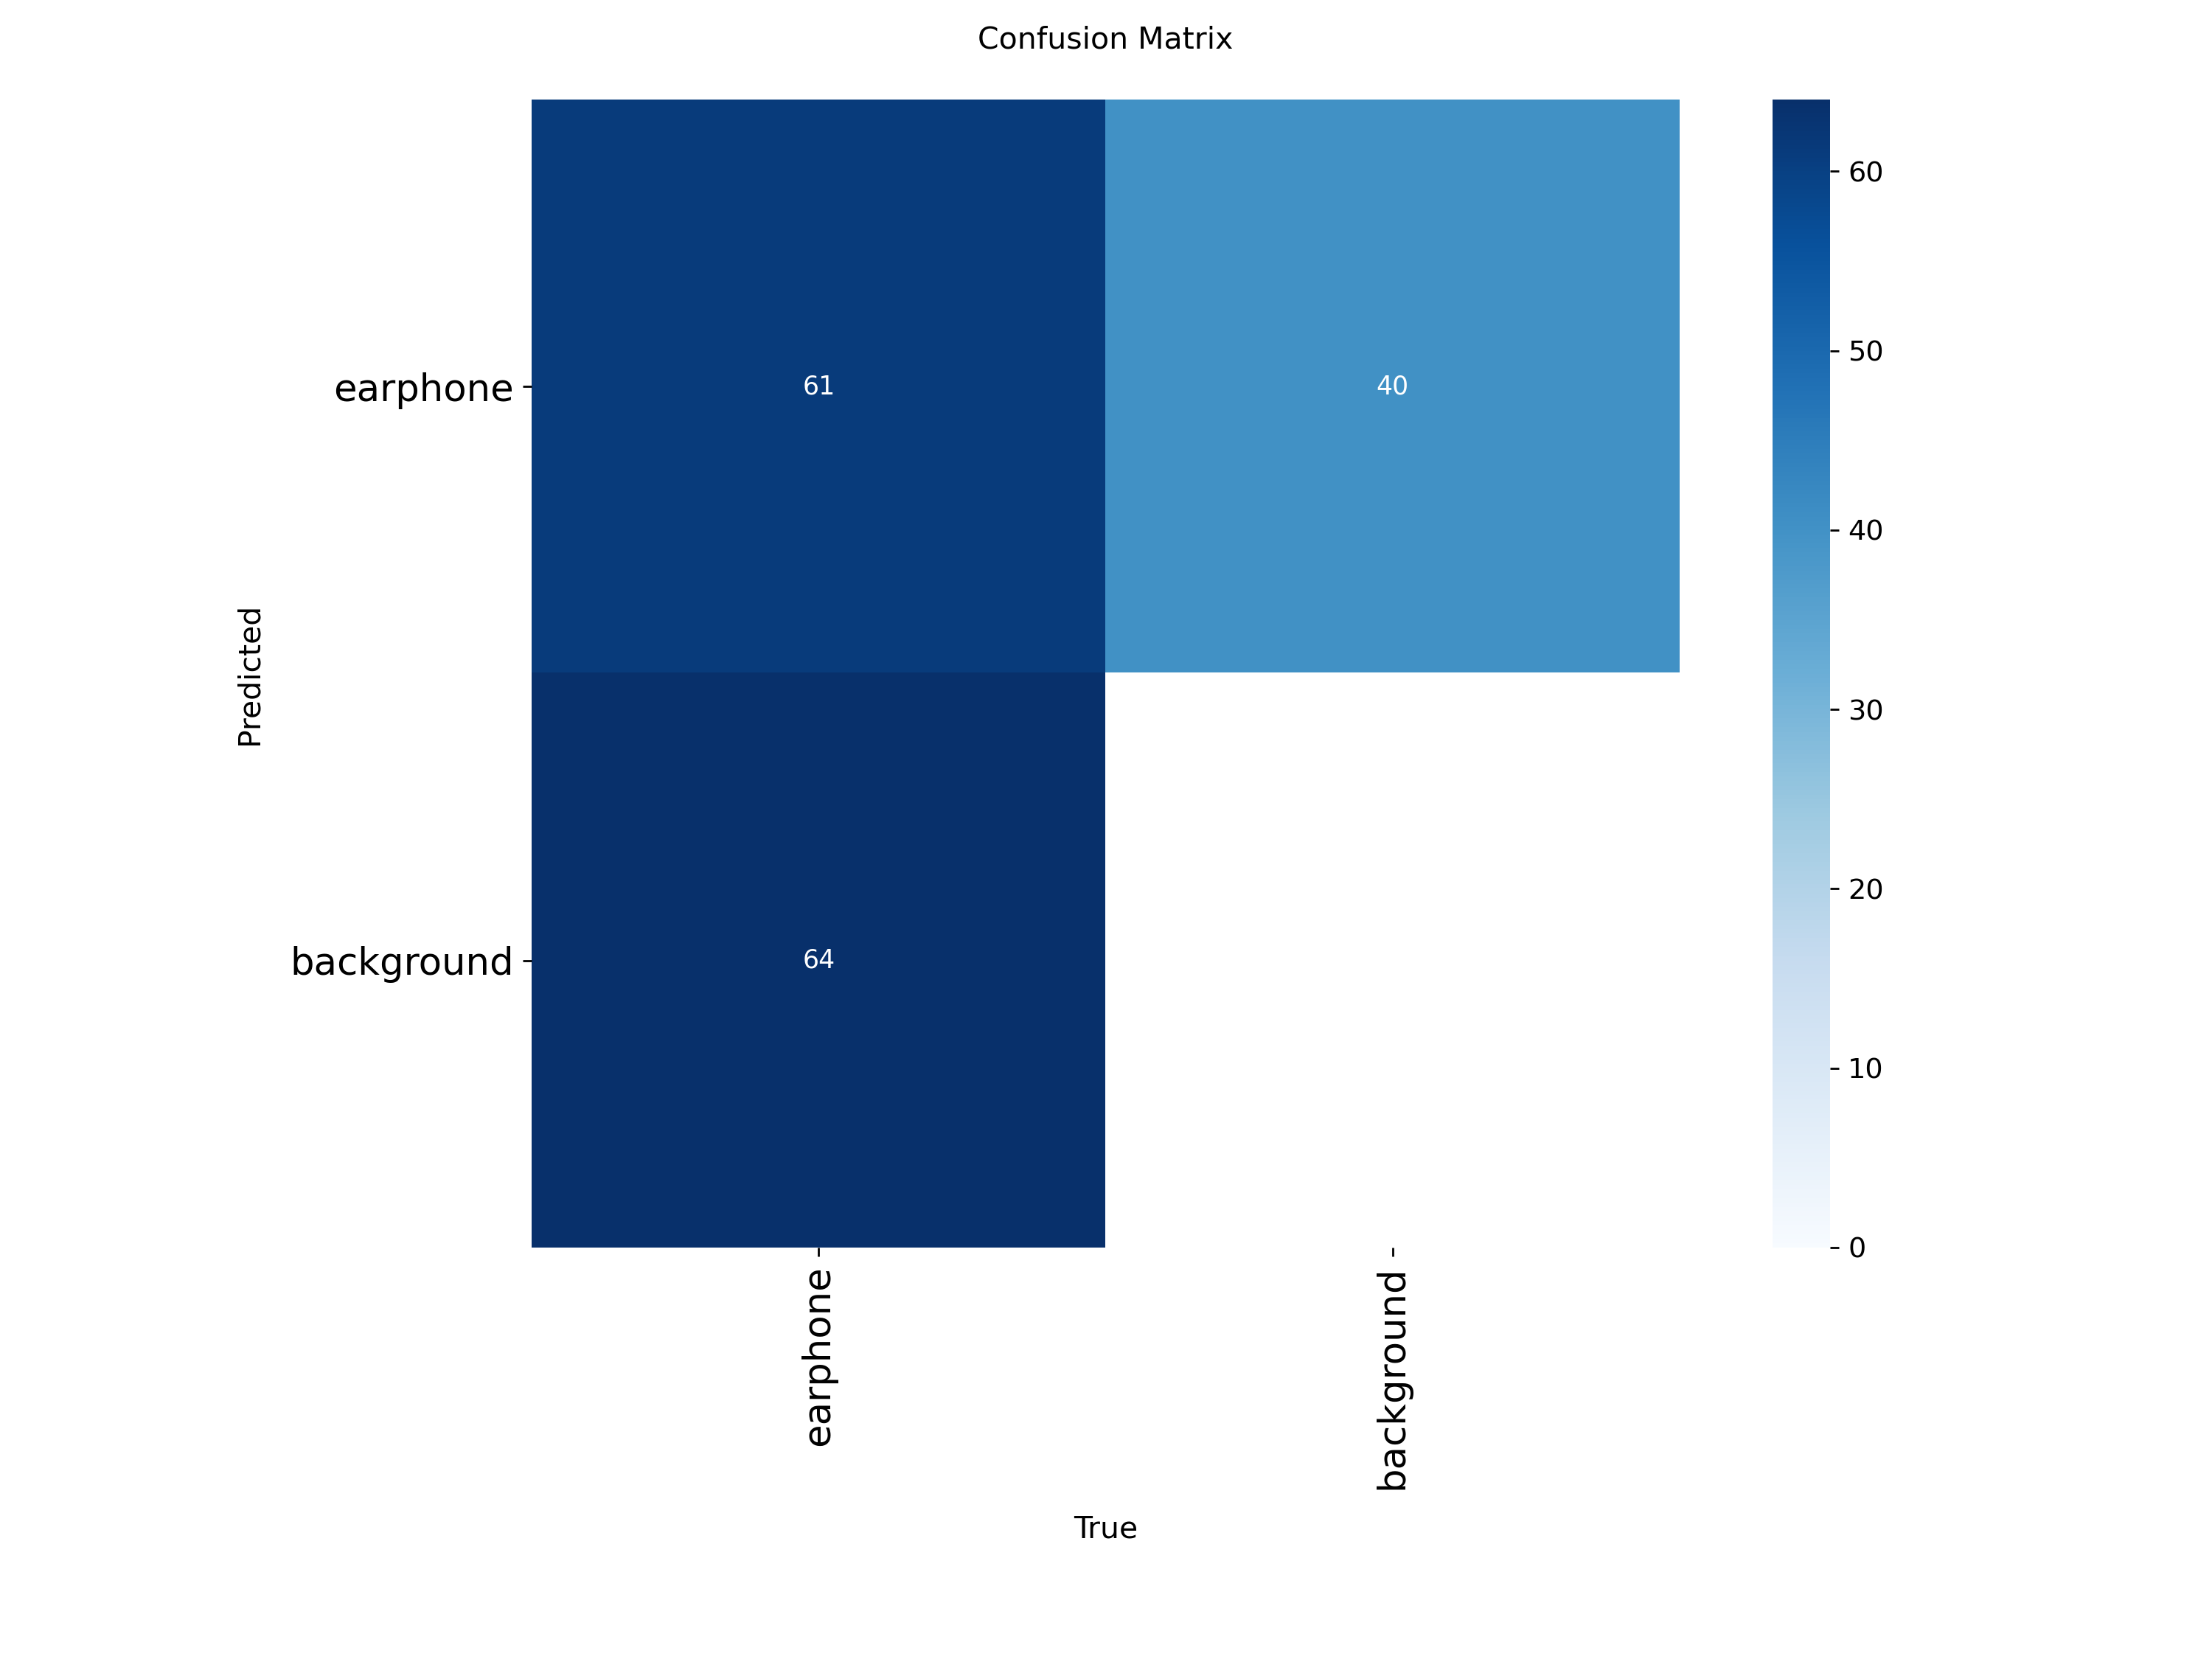


Displaying results.png:


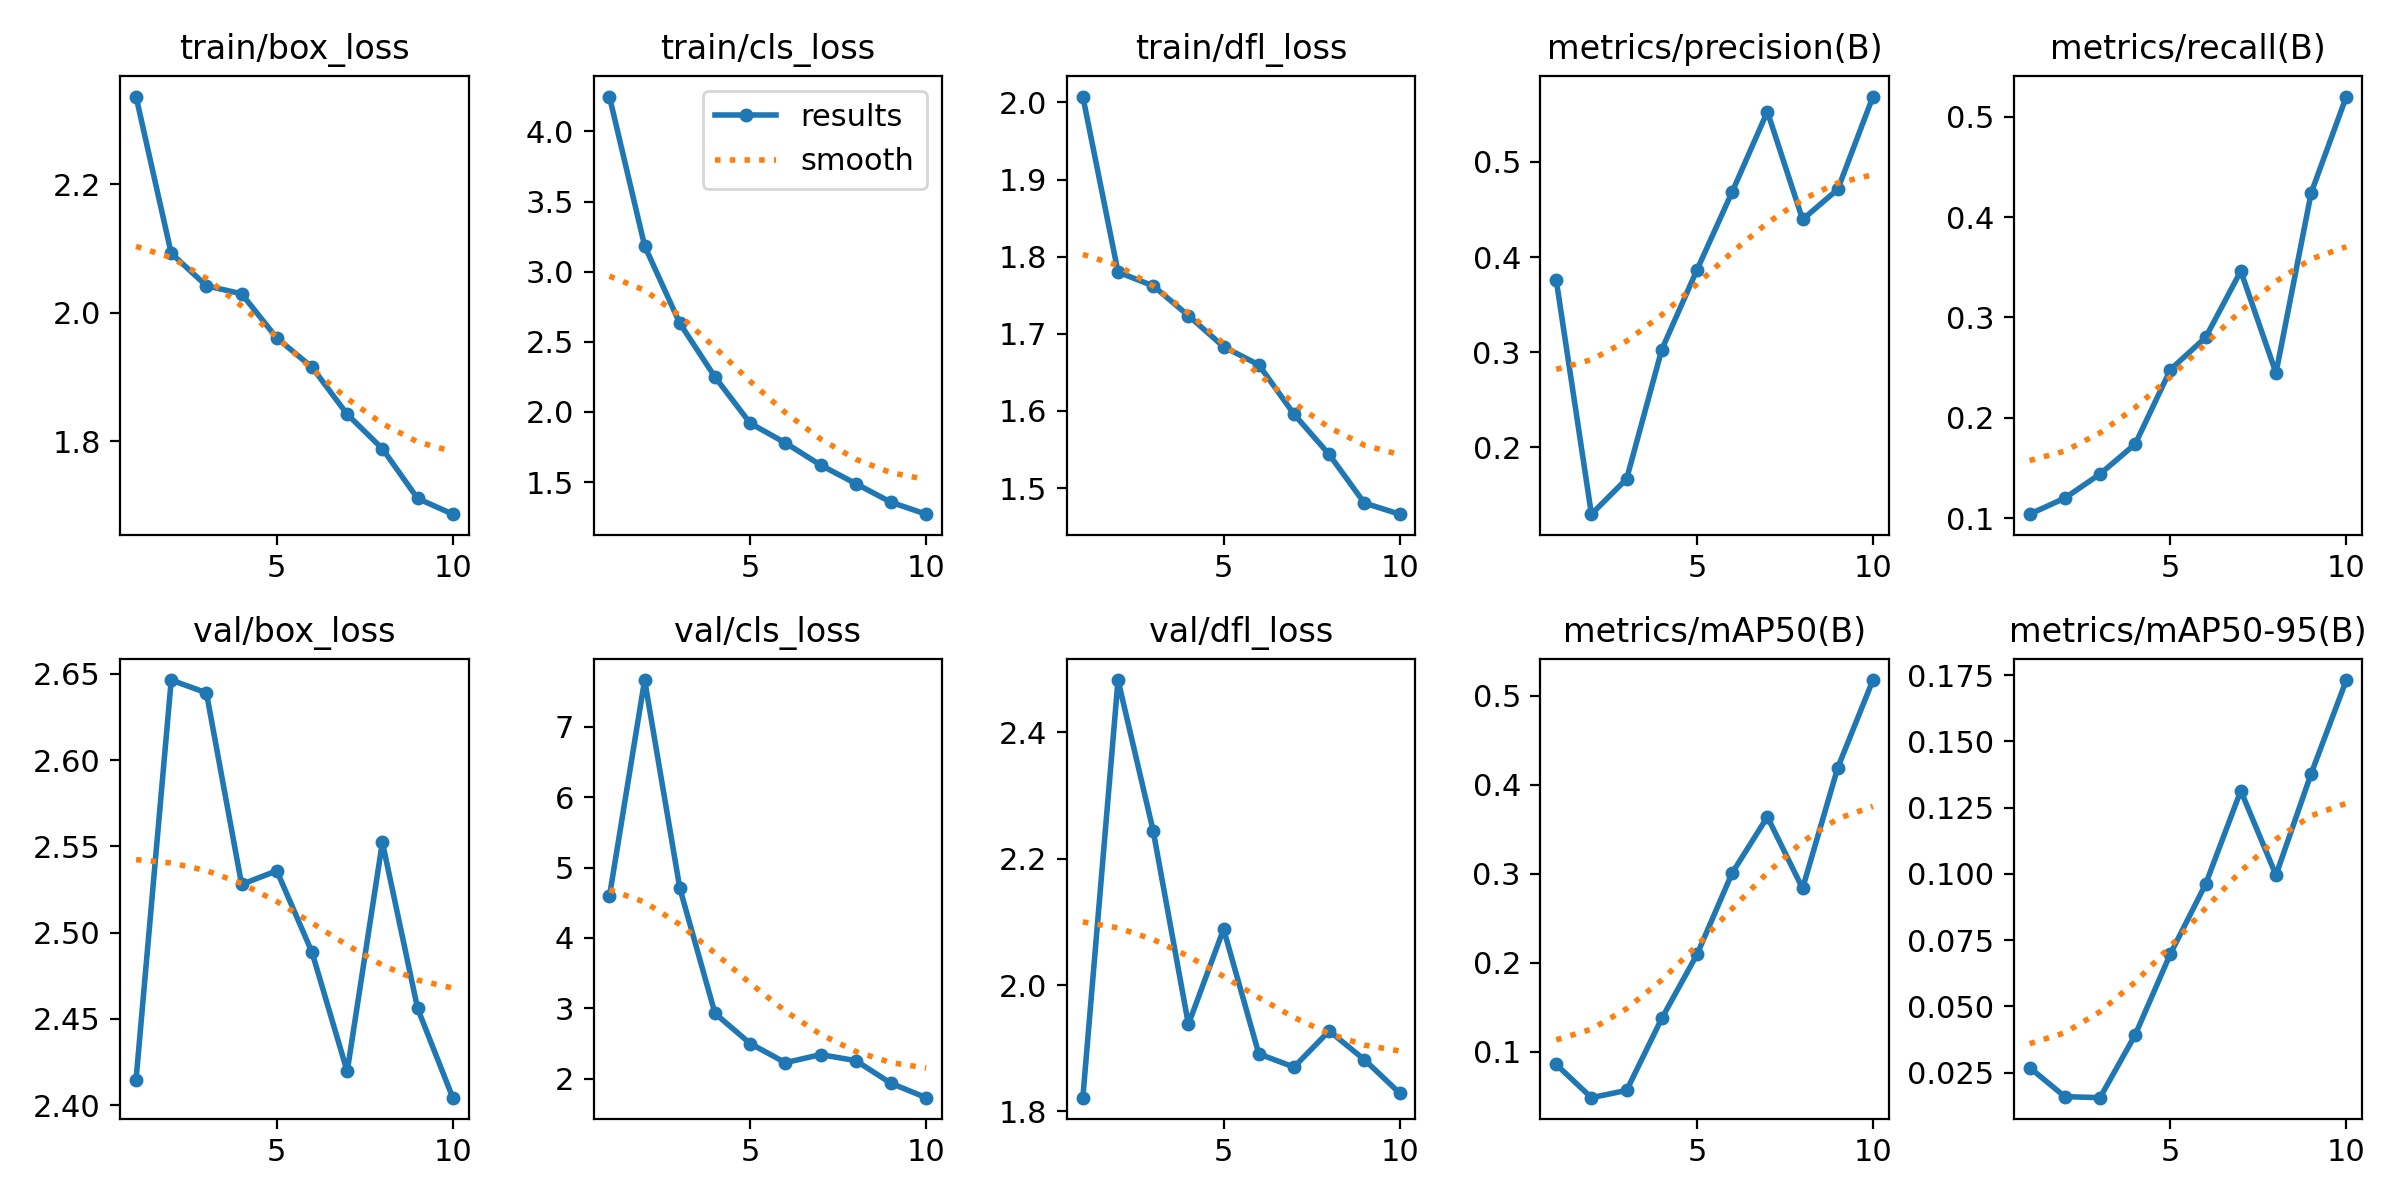


Displaying val_batch0_pred.jpg:


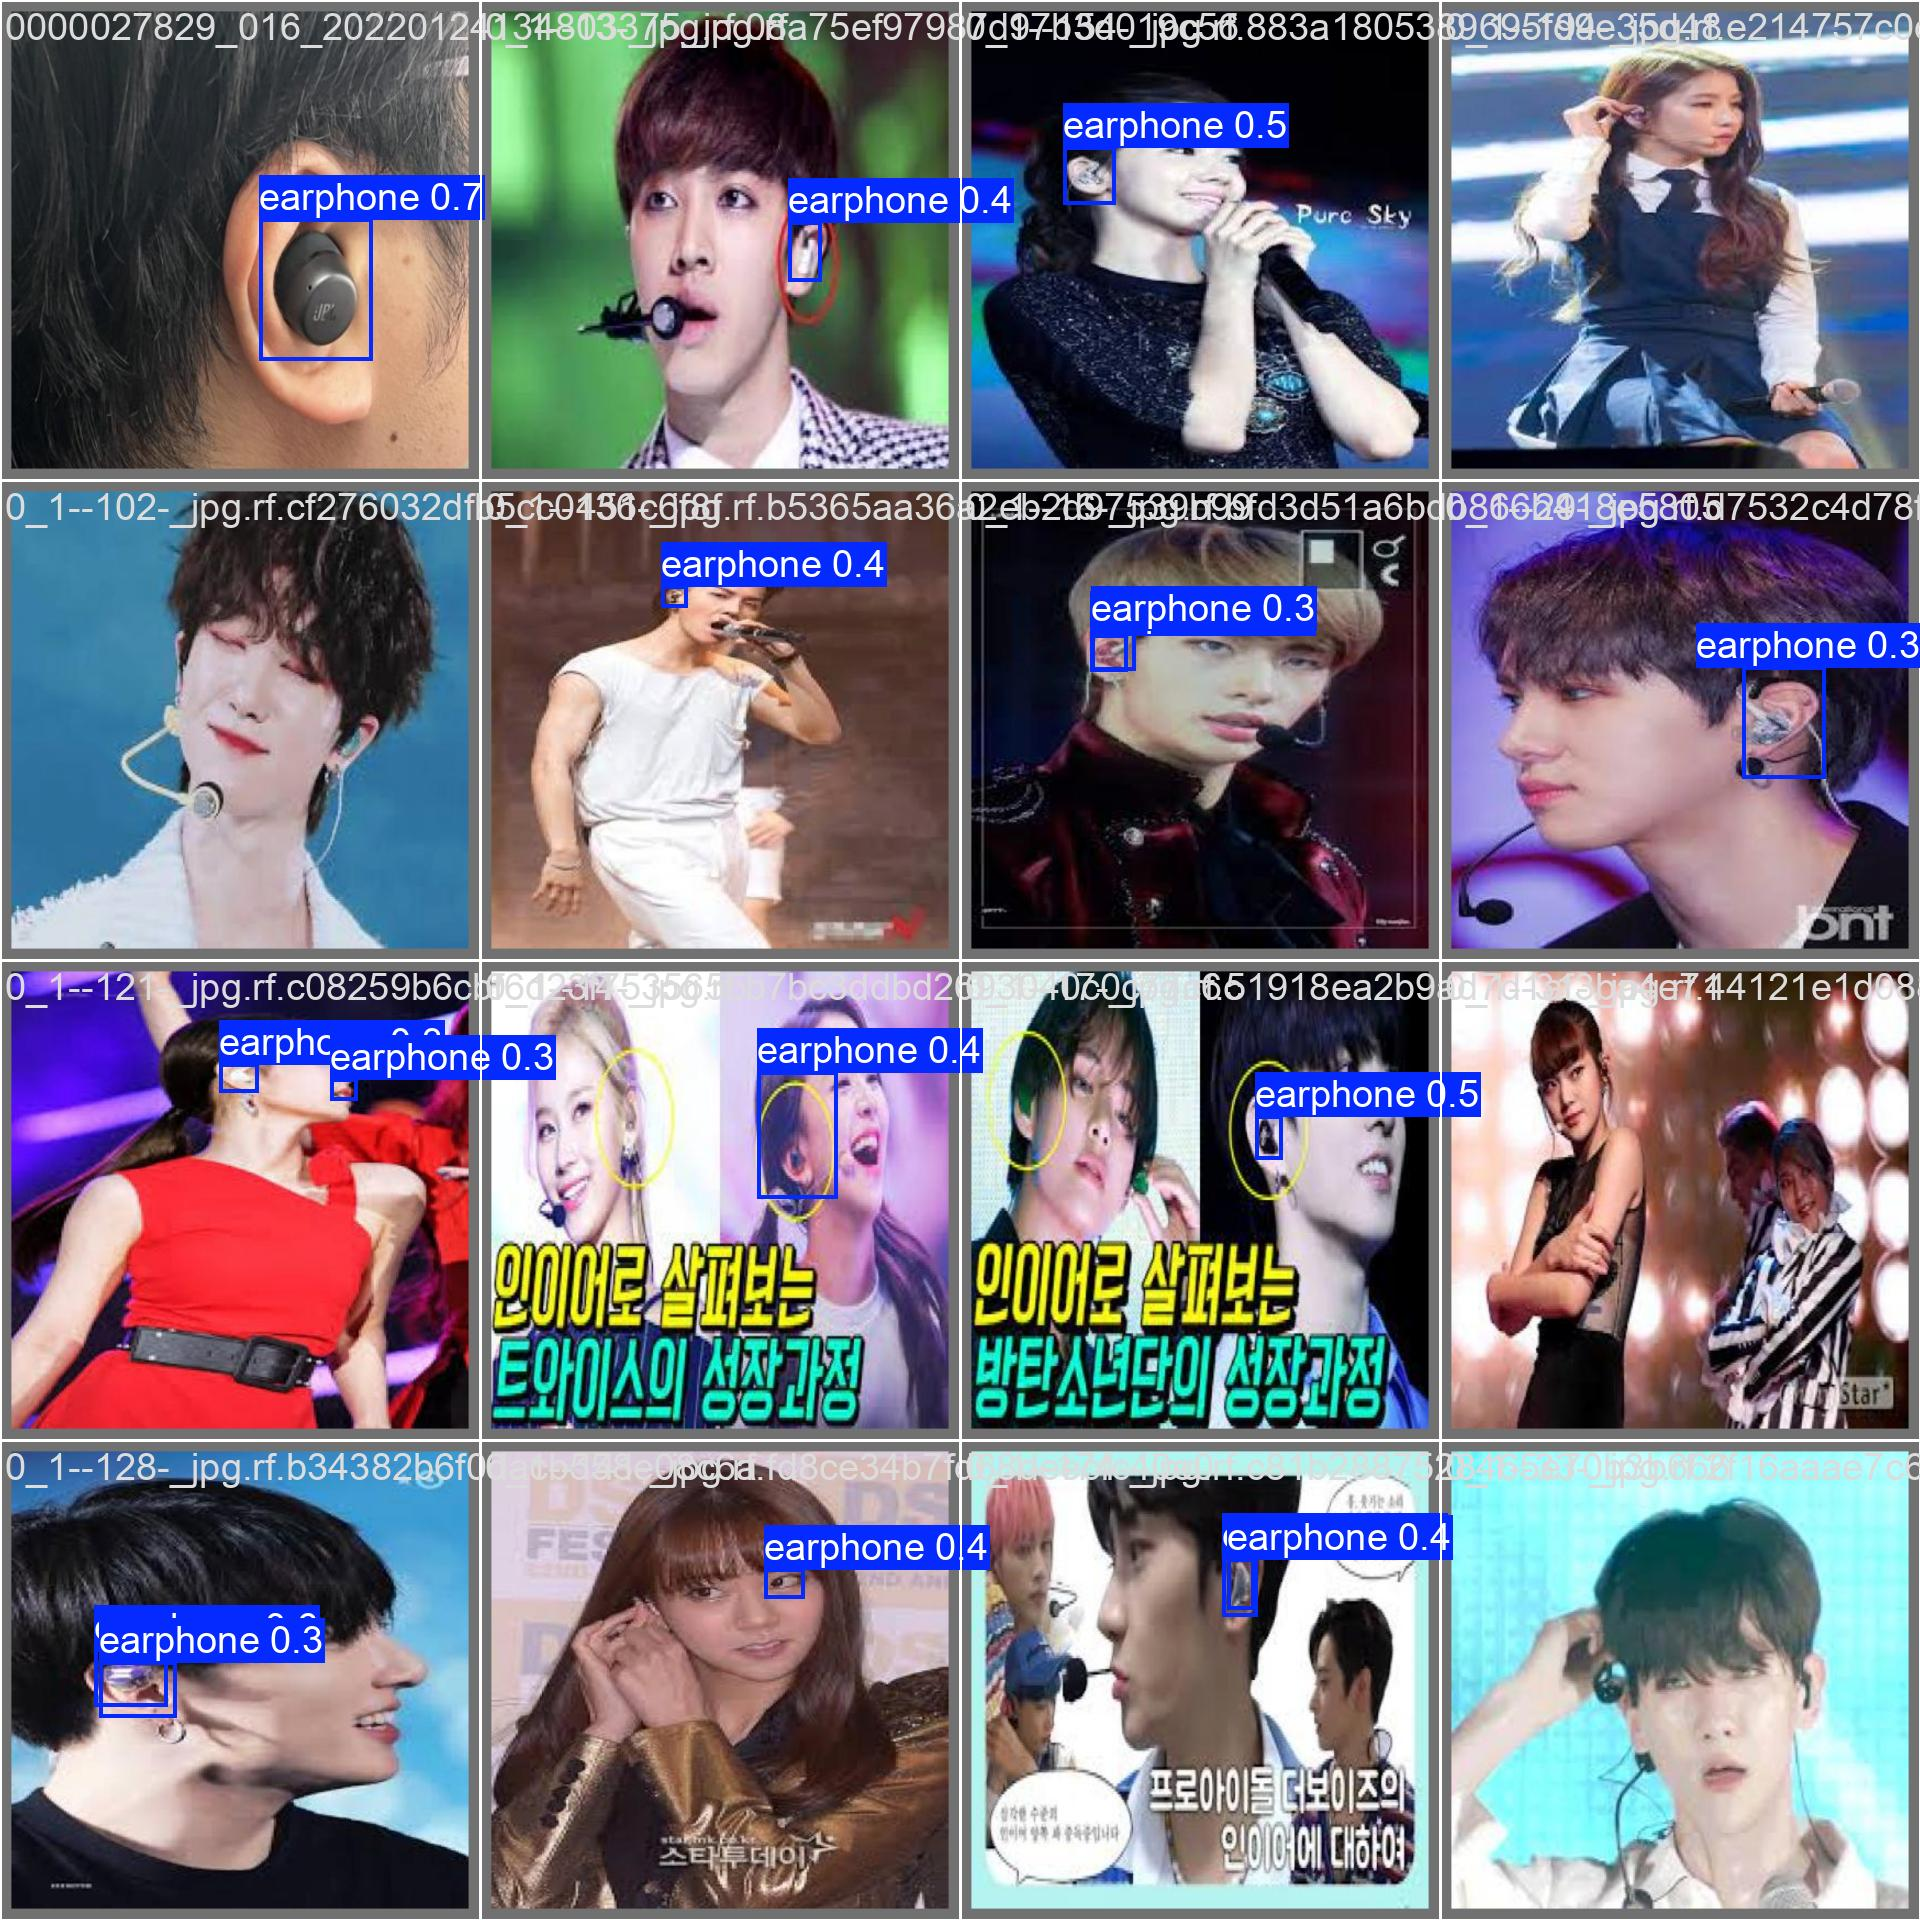

In [ ]:
# 4. Evaluate and Visualize
# Note: YOLOv8 creates a new folder for each run (train, train2, etc.)
# If this is the first run, it will be 'earphone_training'.
evaluate_and_visualize(model, run_folder='/content/runs/earphone_training')

In [ ]:
# 5. Save Model to Drive
save_model_to_drive('/content/runs/earphone_training', DRIVE_DATASET_PATH)

Model saved successfully to: /content/drive/My Drive/data_lahiru_tws_detection/data/best_earphone_model.pt


In [ ]:
# 6. Test Prediction (Optional - pick an image from your test set)
# test_image = os.path.join(DRIVE_DATASET_PATH, 'test/images/some_image.jpg') # Replace 'some_image.jpg' with a real file name
# predict_image(model, test_image)